In [2]:
import torch
import pandas as pd
from torch import nn
from torch import autograd
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
warnings.filterwarnings("ignore")

In [3]:
data = pd.read_csv("./data/housing.csv")
print(data.shape)
data.head()

(505, 1)


,0.00632 18.00 2.310 0 0.5380 6.5750 65.20 4.0900 1 296.0 15.30 396.90 4.98 24.00
0,0.02731 0.00 7.070 0 0.4690 6.4210 78...
1,0.02729 0.00 7.070 0 0.4690 7.1850 61...
2,0.03237 0.00 2.180 0 0.4580 6.9980 45...
3,0.06905 0.00 2.180 0 0.4580 7.1470 54...
4,0.02985 0.00 2.180 0 0.4580 6.4300 58...


In [4]:
data.columns

Index([' 0.00632  18.00   2.310  0  0.5380  6.5750  65.20  4.0900   1  296.0  15.30 396.90   4.98  24.00'], dtype='object')

In [5]:
columns = ['one', 'two', 'three', 'four', 'five', 'six', 'seven', 'eight', 'nine', 'ten', 'eleven', 'twelve', 'thirteen', 'fourteen']
df = pd.read_csv('./data/housing.csv', header=None, delimiter=r"\s+", names=columns)

In [6]:
df.head()

,one,two,three,four,five,six,seven,eight,nine,ten,eleven,twelve,thirteen,fourteen
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [7]:
X = df.drop(['fourteen'],axis=1)
y = df['fourteen']

In [8]:
X_train,X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [9]:
train_inputs = torch.tensor(X_train.values)
train_labels = torch.tensor(y_train.values)

test_inputs = torch.tensor(X_test.values)
test_labels = torch.tensor(y_test.values)

In [10]:
scaler = StandardScaler()
train_inputs_scaled = scaler.fit_transform(train_inputs)
test_inputs_scaled = scaler.transform(test_inputs)

In [11]:
class LinearRegressionModel(nn.Module):
    def __init__(self):
        super(LinearRegressionModel, self).__init__()
        self.linear = nn.Linear(13, 1)  

    def forward(self, x):
        out = self.linear(x)
        return out

In [12]:
model = LinearRegressionModel()
criterion = nn.L1Loss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.2)

In [13]:
epochs = 200
epoch_counts = []
train_loss_vals = []
test_loss_vals = []

In [14]:
for epoch in range(epochs):
    epoch += 1
    
    inputs = torch.from_numpy(train_inputs_scaled.astype(np.float32)).requires_grad_()
    labels = torch.tensor(train_labels, dtype=torch.float32)

    optimizer.zero_grad() 

    outputs = model(inputs)

    loss = criterion(outputs, labels)

    loss.backward()

    optimizer.step()

    model.eval()

    with torch.inference_mode():
        test_pred = model(torch.from_numpy(test_inputs_scaled.astype(np.float32)))
        test_loss = criterion(test_pred, test_labels)
        if epoch%10==0:
            epoch_counts.append(epoch)
            train_loss_vals.append(loss)
            test_loss_vals.append(test_loss)
            print('Epoch: {} | Loss: {} | Test Loss: {}'.format(epoch, loss, test_loss))


Epoch: 10 | Loss: 20.857162475585938 | Test Loss: 19.607230089487985
Epoch: 20 | Loss: 18.857187271118164 | Test Loss: 17.261061232816893
Epoch: 30 | Loss: 16.86444854736328 | Test Loss: 15.36012616295028
Epoch: 40 | Loss: 14.918341636657715 | Test Loss: 13.481148748166834
Epoch: 50 | Loss: 13.116165161132812 | Test Loss: 11.699487848072865
Epoch: 60 | Loss: 11.448600769042969 | Test Loss: 10.062381072962847
Epoch: 70 | Loss: 9.994588851928711 | Test Loss: 8.629497968467644
Epoch: 80 | Loss: 8.876106262207031 | Test Loss: 7.586139293232133
Epoch: 90 | Loss: 8.050736427307129 | Test Loss: 6.768275059777376
Epoch: 100 | Loss: 7.4418463706970215 | Test Loss: 6.235720431699243
Epoch: 110 | Loss: 7.027996063232422 | Test Loss: 5.912274319004526
Epoch: 120 | Loss: 6.8169074058532715 | Test Loss: 5.806630291071638
Epoch: 130 | Loss: 6.728456497192383 | Test Loss: 5.8270474904319585
Epoch: 140 | Loss: 6.701988697052002 | Test Loss: 5.865661088928083
Epoch: 150 | Loss: 6.691883087158203 | Test 

In [15]:
train_loss_vist = [tensor.item() for tensor in train_loss_vals]
test_loss_vist = [tensor.item() for tensor in test_loss_vals]

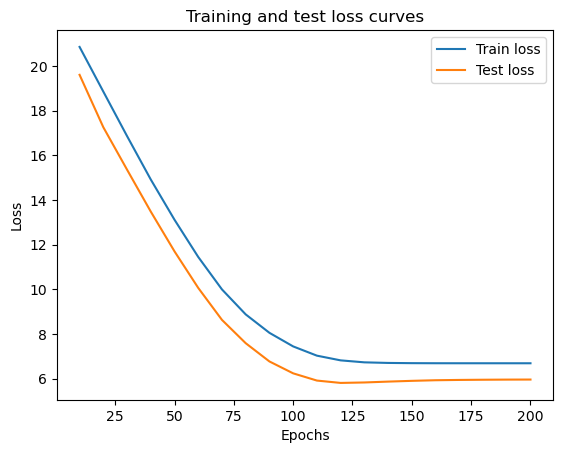

In [16]:
plt.plot(epoch_counts, train_loss_vist, label="Train loss")
plt.plot(epoch_counts, test_loss_vist, label="Test loss")
plt.title("Training and test loss curves")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend();

In [22]:
params = model.state_dict()  

# Вывод параметров модели
for param_name, param_value in params.items():
    print(f'{param_name}: {param_value}\n')

linear.weight: tensor([[ 0.0042,  0.0085, -0.0012,  0.0065, -0.0024,  0.0041, -0.0056,  0.0029,
          0.0088,  0.0096, -0.0105,  0.0037, -0.0011]])

linear.bias: tensor([21.5976])



Аналогичный вариант модели, без использования nn.Linear (код много где повторяется, т.к. изначально это писалось в разных блокнотах)

In [23]:
class LinearRegressionModel1(nn.Module):
    def __init__(self):
        super().__init__()
        self.weights = torch.nn.Parameter(torch.randn(13, 1, dtype=torch.float32), requires_grad=True)
        self.bias = torch.nn.Parameter(torch.randn(1, dtype=torch.float32), requires_grad=True)

    def forward (self, x:torch.Tensor) ->torch.Tensor:
        return torch.matmul(x, self.weights) + self.bias

In [24]:
torch.manual_seed(42)
model_1 = LinearRegressionModel1()

In [25]:
loss_fn_1 = torch.nn.L1Loss()
optimizer_1 = torch.optim.Adam(params=model_1.parameters(), lr=0.5)

In [26]:
epoch_counts_1 = []
train_loss_vals_1 = []
test_loss_vals_1 = []

In [30]:
epochs = 200
for epoch in range (epochs):
    y_pred_1 = model_1(torch.from_numpy(train_inputs_scaled.astype(np.float32)))
    loss_1 = loss_fn_1(y_pred_1, train_labels)
    optimizer_1.zero_grad()
    loss_1.backward()
    optimizer_1.step()
    model_1.eval()

    with torch.inference_mode():
        test_pred_1 = model_1(torch.from_numpy(test_inputs_scaled.astype(np.float32)))
        test_loss_1 = loss_fn_1(test_pred_1, test_labels)
    if epoch%10==0:
        epoch_counts_1.append(epoch)
        train_loss_vals_1.append(loss)
        test_loss_vals_1.append(test_loss)
        print('Epoch: {}\nLoss: {}\nTest Loss: {}'.format(epoch, loss_1, test_loss_1))

Epoch: 0
Loss: 23.986333718807387
Test Loss: 22.5055667356304
Epoch: 10
Loss: 18.986912218275847
Test Loss: 17.13005013716125
Epoch: 20
Loss: 14.104430998125423
Test Loss: 12.421557880117087
Epoch: 30
Loss: 9.96404582375043
Test Loss: 8.452065757456673
Epoch: 40
Loss: 7.509244507212884
Test Loss: 6.1918913466157655
Epoch: 50
Loss: 6.7046005923588385
Test Loss: 5.889488244194198
Epoch: 60
Loss: 6.750305182016921
Test Loss: 6.169086219365209
Epoch: 70
Loss: 6.741636910151995
Test Loss: 6.120363625523128
Epoch: 80
Loss: 6.69172822568314
Test Loss: 5.979249667644685
Epoch: 90
Loss: 6.69008797032379
Test Loss: 5.906877502227279
Epoch: 100
Loss: 6.690301790462734
Test Loss: 5.910437873142217
Epoch: 110
Loss: 6.68789392059404
Test Loss: 5.934748135837671
Epoch: 120
Loss: 6.6875130035143115
Test Loss: 5.956849749388029
Epoch: 130
Loss: 6.688460710808035
Test Loss: 5.9704495900413335
Epoch: 140
Loss: 6.688038642251506
Test Loss: 5.959498698268657
Epoch: 150
Loss: 6.687437726184325
Test Loss: 5.

In [32]:
train_loss_vist_1= [tensor.item() for tensor in train_loss_vals]
test_loss_vist_1 = [tensor.item() for tensor in test_loss_vals]

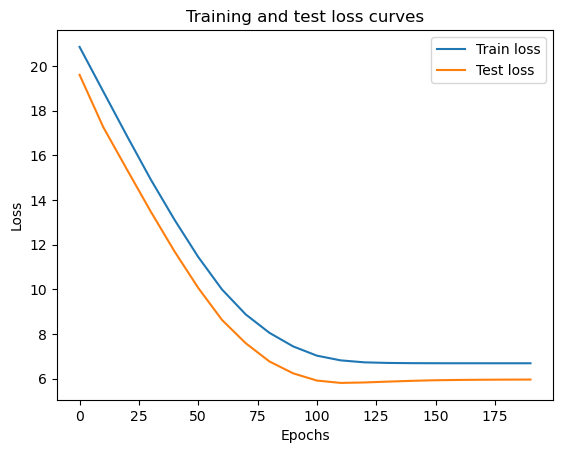

In [33]:
plt.plot(epoch_counts_1, train_loss_vist_1, label="Train loss")
plt.plot(epoch_counts_1, test_loss_vist_1, label="Test loss")
plt.title("Training and test loss curves")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend();

In [34]:
params = model_1.state_dict()  

# Вывод параметров модели
for param_name, param_value in params.items():
    print(f'{param_name}: {param_value}\n')

weights: tensor([[ 0.0162],
        [-0.0190],
        [ 0.0133],
        [-0.0180],
        [ 0.0077],
        [ 0.0045],
        [ 0.0159],
        [-0.0175],
        [ 0.0018],
        [ 0.0180],
        [ 0.0171],
        [-0.0227],
        [ 0.0059]])

bias: tensor([21.5506])

